In [1]:
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
res_frame = pd.DataFrame()
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
import pandas as pd

def get_cwd():
    try:
        chdir(dirname(realpath(__file__)))
    except:
        chdir('/Users/nedei/Documents/School/QTW')
    active_dir = getcwd()
       
    return active_dir

def main():
    
    get_cwd()
    
    directories = [
        '/spam/',
        '/easy_ham/',
        '/easy_ham_2',
        '/hard_ham/',
        '/spam_2/'
        ]
    
    res_frame = pd.DataFrame()
        
    for d in directories:
        mypath = getcwd() + '/SpamAssassinMessages/' + d + '/'
        onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
        try:
            onlyfiles.remove('.DS_Store')
        except:
            pass
        
        for file in onlyfiles:
            with open(mypath + file, encoding='latin1') as f:
                lines = f.readlines()
                f.close()
                
            in_reply_count = 0
            sub_line_all_caps = 0
            attachments = 0
            subject_line = []
            n_lines = 0
            blank_lines = []
            
            for line in lines:
               n_lines += 1
               if "Subject: Re: " in line:
                   in_reply_count += 1
               if "Subject: " in line:
                   s_line = line.strip().replace('Subject: ','')
                   subject = s_line
                   s_line = ''.join(e for e in s_line if e.isalnum())
                   num_upper = sum(1 for c in s_line if c.isupper())
                   ttl_chars = len(s_line)
                   if num_upper == ttl_chars:
                       sub_line_all_caps += 1
                   subject_line.append(s_line)
               if "content-type: multipart" in line.lower():
                   attachments += 1
               if line == "\n":
                   blank_lines.append(n_lines)
               if "From:" in line:
                   f_line = line.strip().replace('From: ','')
                   fromline = f_line
            
                 
        
            temp_frame = pd.DataFrame({
                        'filename':file,
                        'is_spam':[1 if 'spam' in d else 0],
                        'in_reply': [1 if in_reply_count > 0 else 0], 
                        'subj_caps': [1 if sub_line_all_caps > 0 else 0], 
                        'attachments': [1 if attachments > 0 else 0], 
                        'body_lines': n_lines - len(blank_lines),
                        'Subject': subject,
                        'From': fromline
                        }, index=[0])
           
            res_frame = res_frame.append(temp_frame, ignore_index=True)
            
    res_frame.to_csv('output_file.csv', index=False)
    
    return res_frame


In [3]:
if __name__ == "__main__":
    res_frame = main()
    pass       

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/nedei/Documents/School/QTW'

In [ ]:
res_frame.head()

,filename,is_spam,in_reply,subj_caps,attachments,body_lines,Subject,From
0,00001.7848dde101aa985090474a91ec93fcf0,1,0,0,0,120,Life Insurance - Why Pay More?,12a1mailbot1@web.de
1,00002.d94f1b97e48ed3b553b3508d116e6a09,1,0,0,0,59,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,"""Slim Down"" <taylor@s3.serveimage.com>"
2,00003.2ee33bc6eacdb11f38d052c44819ba6c,1,0,0,0,43,Guaranteed to lose 10-12 lbs in 30 days ...,"""Slim Down"" <sabrina@mx3.1premio.com>"
3,00004.eac8de8d759b7e74154f142194282724,1,1,0,0,90,Re: Fw: User Name & Password to Membership To ...,Account Services <wsup@playful.com>
4,00005.57696a39d7d84318ce497886896bf90d,1,0,0,0,55,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,"""Slim n Trim"" <yenene@mx2.1premio.com>"


In [ ]:
subject_lines = res_frame['Subject'].tolist()
from_lines = res_frame['From'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
x = vectorizer.fit_transform(subject_lines)
y = vectorizer.fit_transform(from_lines)

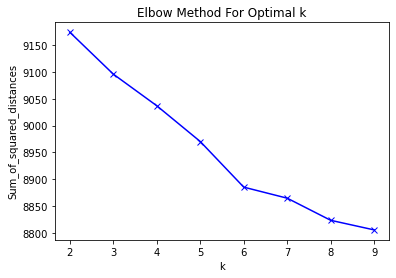

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=40, n_init=10,random_state = 0)
   km = km.fit(x)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=40, n_init=10,random_state = 0)
model.fit(x)
labels=model.labels_
subject_cluster=pd.DataFrame(list(zip(subject_lines,labels)),columns=['subject_lines','subject_cluster'])
print(subject_cluster)

                                          subject_lines  subject_cluster
0                        Life Insurance - Why Pay More?                1
1     [ILUG] Guaranteed to lose 10-12 lbs in 30 days...                1
2     Guaranteed to lose 10-12 lbs in 30 days       ...                1
3     Re: Fw: User Name & Password to Membership To ...                1
4     [ILUG-Social] re: Guaranteed to lose 10-12 lbs...                3
...                                                 ...              ...
9348             Preferred Non-Smoker Rates for Smokers                1
9349  How to get 10,000 FREE hits per day to any web...                1
9350                                Cannabis Difference                1
9351                              [ILUG] WILSON  KAMELA                3
9352                              [ILUG] WILSON  KAMELA                3

[9353 rows x 2 columns]


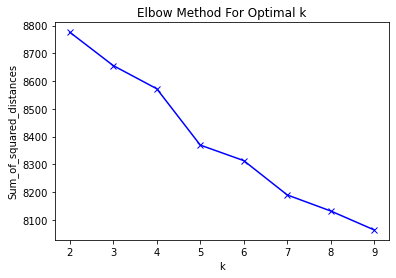

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=40, n_init=10,random_state = 0)
   km = km.fit(y)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=40, n_init=10,random_state = 0)
model.fit(y)
labels=model.labels_
from_cluster=pd.DataFrame(list(zip(from_lines,labels)),columns=['from_lines','from_cluster'])
print(from_cluster)

                                             from_lines  from_cluster
0                                   12a1mailbot1@web.de             0
1                "Slim Down" <taylor@s3.serveimage.com>             0
2                 "Slim Down" <sabrina@mx3.1premio.com>             0
3                   Account Services <wsup@playful.com>             0
4                "Slim n Trim" <yenene@mx2.1premio.com>             0
...                                                 ...           ...
9348                          "IQ - TBA" <tba@insiq.us>             0
9349                               Mike <raye@yahoo.lv>             0
9350                   "Mr. Clean" <cweqx@dialix.oz.au>             0
9351  "wilsonkamela400@netscape.net" <wilsonkamela50...             0
9352  "wilsonkamela400@netscape.net" <wilsonkamela50...             0

[9353 rows x 2 columns]


In [ ]:
cluster_frame = res_frame.join(subject_cluster)
cluster_frame = cluster_frame.drop(['Subject','subject_lines'],axis = 1)
cluster_frame = cluster_frame.join(from_cluster)
cluster_frame = cluster_frame.drop(['From','from_lines'],axis = 1)
print(cluster_frame.groupby(['from_cluster','is_spam']).count())
print(cluster_frame.groupby(['subject_cluster','is_spam']).count())

                      filename  in_reply  subj_caps  attachments  body_lines  \
from_cluster is_spam                                                           
0            0            4861      4861       4861         4861        4861   
             1            2393      2393       2393         2393        2393   
1            0             642       642        642          642         642   
2            0             807       807        807          807         807   
             1               6         6          6            6           6   
3            0              79        79         79           79          79   
4            0             565       565        565          565         565   

                      subject_cluster  
from_cluster is_spam                   
0            0                   4861  
             1                   2393  
1            0                    642  
2            0                    807  
             1                      6  

In [ ]:
cluster_frame.head()

,filename,is_spam,in_reply,subj_caps,attachments,body_lines,subject_cluster,from_cluster
0,00001.7848dde101aa985090474a91ec93fcf0,1,0,0,0,120,1,0
1,00002.d94f1b97e48ed3b553b3508d116e6a09,1,0,0,0,59,1,0
2,00003.2ee33bc6eacdb11f38d052c44819ba6c,1,0,0,0,43,1,0
3,00004.eac8de8d759b7e74154f142194282724,1,1,0,0,90,1,0
4,00005.57696a39d7d84318ce497886896bf90d,1,0,0,0,55,3,0


In [ ]:
subject_cluster = pd.get_dummies(cluster_frame.subject_cluster, prefix = 'subject_cluster')
df_onehot = pd.concat((cluster_frame,subject_cluster),axis = 1)
from_cluster = pd.get_dummies(cluster_frame.from_cluster, prefix = 'from_cluster')
df_onehot = pd.concat((df_onehot,from_cluster),axis = 1)
target = df_onehot['is_spam']
data = df_onehot.drop(['filename','is_spam','subject_cluster','from_cluster'],axis = 1)
data.head()

,in_reply,subj_caps,attachments,body_lines,subject_cluster_0,subject_cluster_1,subject_cluster_2,subject_cluster_3,subject_cluster_4,subject_cluster_5,from_cluster_0,from_cluster_1,from_cluster_2,from_cluster_3,from_cluster_4
0,0,0,0,120,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,59,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,43,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,90,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,55,0,0,0,1,0,0,1,0,0,0,0


In [62]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

X_dev_train,X_dev_test,Y_train,Y_test = train_test_split(data,target,test_size=0.20,random_state=0)

scaler = StandardScaler()
cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

var = [.25,.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
var = [.25]
for x in var:
    # define the pipeline
    steps = list()
    steps.append(('scaler', scaler))
    steps.append(('model', GaussianNB(var_smoothing=x)))
    pipeline = Pipeline(steps=steps)

    #Modeling with pipeline and scoring with cross_validate()
    scores = cross_validate(pipeline, X=X_dev_train, y=Y_train, scoring=['roc_auc','accuracy','precision','recall'],
                             cv=cv, return_train_score=True)
    columns = ['Var','Prec','AUC']
    df3 = []
    prec = np.mean(scores['test_precision'])
    auc = np.mean(scores['test_roc_auc'])
    rec = np.mean(scores['test_recall'])
    f1 = 2*((prec*rec)/(prec+rec))
    values = [x,prec,auc,rec]
    zipped = zip(columns,values)
    dictionary = dict(zipped)
    df3.append(dictionary)
    
    
    print('When VAR =',x)
    print('   Mean Precision: ',prec)
    print('   Mean AUC: ',auc)
    print('   Mean Recall: ',rec)
    print('   Mean F1: ',f1)
    print('   Mean Time per Split: ',np.mean(scores['fit_time'])+np.mean(scores['score_time']))
    print(' ')

When VAR = 0.25
   Mean Precision:  0.5718870467124106
   Mean AUC:  0.8795373043164803
   Mean Recall:  0.9599738493723852
   Mean F1:  0.7167708387124053
   Mean Time per Split:  0.015110158920288086
 
When VAR = 0.5
   Mean Precision:  0.5607134960008139
   Mean AUC:  0.8777970709440959
   Mean Recall:  0.9729044630404463
   Mean F1:  0.7114166334974781
   Mean Time per Split:  0.014676094055175781
 
When VAR = 1
   Mean Precision:  0.5349029239811846
   Mean AUC:  0.8771801159130407
   Mean Recall:  0.9824895397489539
   Mean F1:  0.6926837191490205
   Mean Time per Split:  0.013502120971679688
 
When VAR = 2
   Mean Precision:  0.5817380155770397
   Mean AUC:  0.8763935945494075
   Mean Recall:  0.949973849372385
   Mean F1:  0.7215925065674416
   Mean Time per Split:  0.0158174991607666
 
When VAR = 3
   Mean Precision:  0.582392926499114
   Mean AUC:  0.8755681182258062
   Mean Recall:  0.9495571827057183
   Mean F1:  0.7219757134274862
   Mean Time per Split:  0.015052914619445

C:\Users\nedei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nedei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nedei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When VAR = 15
   Mean Precision:  0.6666666666666667
   Mean AUC:  0.8749983024077059
   Mean Recall:  0.004168410041841004
   Mean F1:  0.00828501706120985
   Mean Time per Split:  0.01559116840362549
 


C:\Users\nedei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# from sklearn.model_selection import train_test_split
# from sklearn import metrics as mt
# from sklearn.metrics import plot_confusion_matrix, roc_auc_score

# X_dev_train,X_dev_test,Y_train,Y_test = train_test_split(data,target,test_size=0.20,random_state=0)
# X_train = scaler.fit_transform(X_dev_train)
# X_test = scaler.transform(X_dev_test)

VAR Smoothing: 15 AUC: 0.5956114105102412 Precision: 0.8095238095238095 ACC: 0.780331373597007 F1 Score: 0.33170731707317075


C:\Users\nedei\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


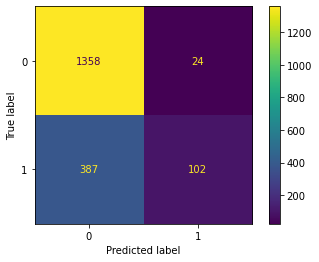

In [64]:
clf_gnb = GaussianNB(var_smoothing = 6)
clf_gnb.fit(X_train,Y_train.values.ravel())
yhat = clf_gnb.predict(X_test)
acc = mt.accuracy_score(Y_test,yhat)
prec = mt.precision_score(Y_test,yhat)
auc = roc_auc_score(Y_test,yhat)
recall = mt.recall_score(Y_test,yhat)
f1 = 2*((prec*recall)/(prec+recall))
print('VAR Smoothing:',x,'AUC:',auc,'Precision:',prec,'ACC:',acc,'F1 Score:',f1)
plot_confusion_matrix(clf_gnb,X_test,Y_test)

VAR Smoothing: 15 AUC: 0.8447257908428257 Precision: 0.5951742627345844 ACC: 0.814537680384821 F1 Score: 0.7190283400809715


C:\Users\nedei\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


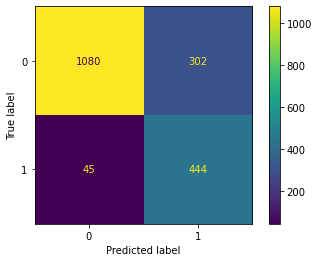

In [55]:
clf_gnb = GaussianNB(var_smoothing = 5)
clf_gnb.fit(X_train,Y_train.values.ravel())
yhat = clf_gnb.predict(X_test)
acc = mt.accuracy_score(Y_test,yhat)
prec = mt.precision_score(Y_test,yhat)
auc = roc_auc_score(Y_test,yhat)
recall = mt.recall_score(Y_test,yhat)
f1 = 2*((prec*recall)/(prec+recall))
print('VAR Smoothing:',x,'AUC:',auc,'Precision:',prec,'ACC:',acc,'F1 Score:',f1)
plot_confusion_matrix(clf_gnb,X_test,Y_test)

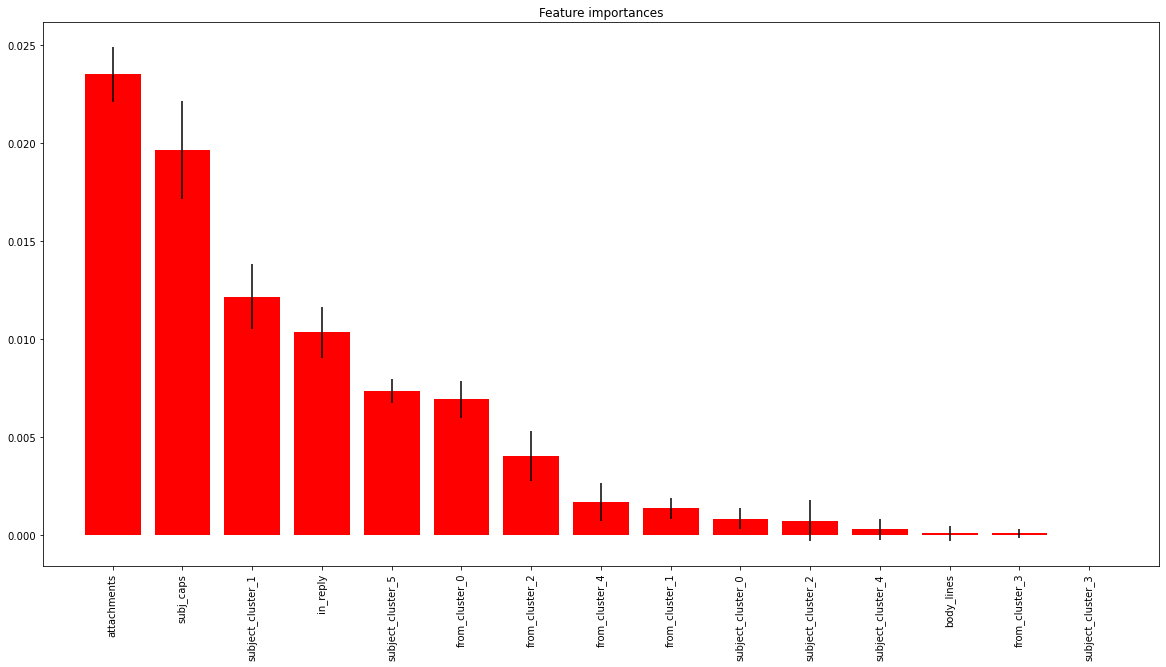

In [67]:
features = list(data.columns.values)


from sklearn.inspection import permutation_importance

imps = permutation_importance(clf_gnb, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking

featureorder = []

for f in range(X_test.shape[1]):
    featureorder.append(features[indices[f]])
featurecount = len(featureorder)
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[indices[i]] for i in range(featurecount)],rotation = 90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [70]:
print(cluster_frame.groupby(['attachments','is_spam']).count().reset_index())

   attachments  is_spam  filename  in_reply  subj_caps  body_lines  \
0            0        0      6610      6610       6610        6610   
1            0        1      1989      1989       1989        1989   
2            1        0       344       344        344         344   
3            1        1       410       410        410         410   

   subject_cluster  from_cluster  
0             6610          6610  
1             1989          1989  
2              344           344  
3              410           410  
